# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


# Data 

## Read the data

In [2]:
df_store=pd.read_csv(r'stores.csv')
df_feature=pd.read_csv(r'features.csv')
df_train=pd.read_csv(r'train.csv')
df_test=pd.read_csv(r'test.csv')

## Merge Data 

In [3]:
df_merged=pd.merge(df_store,df_train,how='outer')

In [4]:
df=pd.merge(df_merged,df_feature,how='outer')

In [5]:
df = pd.merge(df,df_test, how='left')

# EDA:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     423325 non-null  bool   
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 48.8+ MB


In [7]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
dtype: int64

In [8]:
df.describe()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,423325.000000,421570.000000,421570.000000,421570.000000,423325.000000,423325.000000,152433.000000,112532.000000,138658.000000,136466.000000,153187.000000,422740.000000,422740.000000
mean,22.203860,136727.915739,44.260317,15981.258123,60.067140,3.361933,7246.604247,3337.597289,1449.098932,3382.019834,4618.743783,171.218863,7.957296
std,12.786244,60980.583328,30.492054,22711.183519,18.452599,0.458038,8319.906707,9461.265420,9674.705234,6306.728468,6258.233496,39.167088,1.863433
min,1.000000,34875.000000,1.000000,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,11.000000,93638.000000,18.000000,2079.650000,46.670000,2.935000,2230.800000,42.000000,5.140000,500.910000,1863.720000,132.022667,6.891000
50%,22.000000,140167.000000,37.000000,7612.030000,62.070000,3.452000,5336.520000,194.670000,24.830000,1465.540000,3340.020000,182.350989,7.866000
75%,33.000000,202505.000000,74.000000,20205.852500,74.260000,3.738000,9210.900000,1943.200000,104.500000,3592.000000,5535.130000,212.512605,8.567000
max,45.000000,219622.000000,99.000000,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [9]:
len(df)

423325

In [10]:
df.shape

(423325, 16)

In [11]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
## convert Date from Object to Date

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day']=df['Date'].dt.day

In [16]:
df.dtypes

Store                    int64
Type                    object
Size                   float64
Dept                   float64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Week                    UInt32
Day                      int32
dtype: object

## Data Visualization

### Visuals of Sales

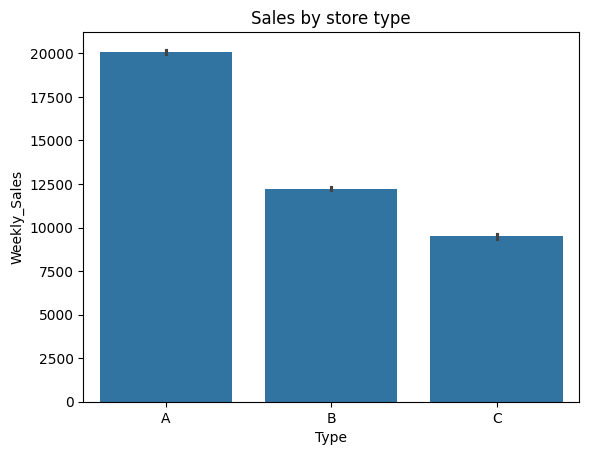

In [17]:
sns.barplot(x='Type',y='Weekly_Sales',data=df)
plt.title('Sales by store type')
plt.show()

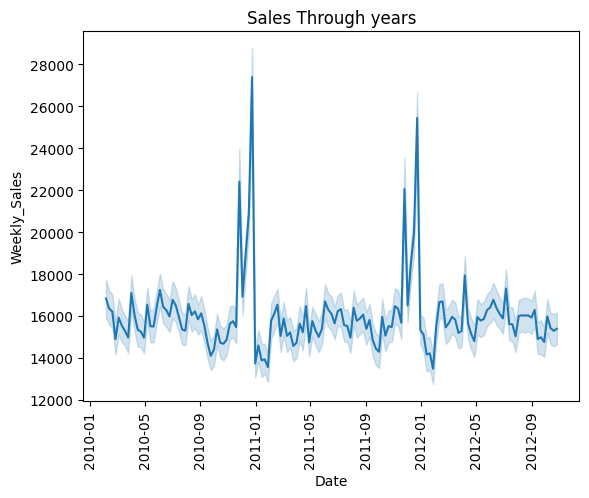

In [18]:
sns.lineplot(x='Date',y='Weekly_Sales',data=df)
plt.title('Sales Through years')
plt.xticks(rotation=90)
plt.show()

In [19]:
data_store=df.groupby('Store')['Weekly_Sales'].sum().reset_index()
data_store_sorted=data_store.sort_values(by='Weekly_Sales',ascending=False)

In [20]:
top_store=data_store_sorted.head(5)
bottom_store=data_store_sorted.tail(5)
order1=top_store.sort_values('Weekly_Sales', ascending=False)['Store']
order2=bottom_store.sort_values('Weekly_Sales', ascending=True)['Store']

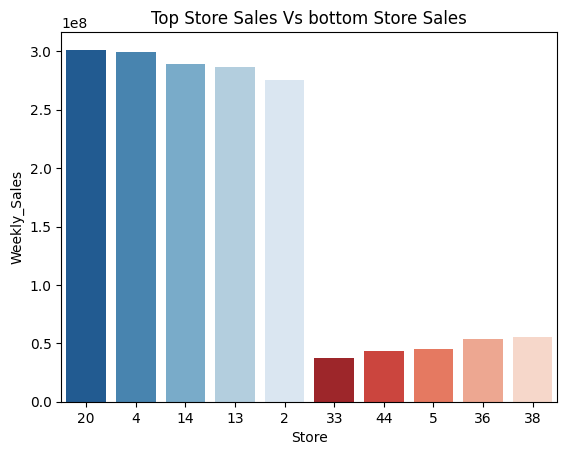

In [21]:
sns.barplot(data=top_store,x='Store',y='Weekly_Sales', palette="Blues_r",order=order1)
sns.barplot(data=bottom_store,x='Store',y='Weekly_Sales', palette="Reds_r",order=order2)

plt.title("Top Store Sales Vs bottom Store Sales")
plt.show()

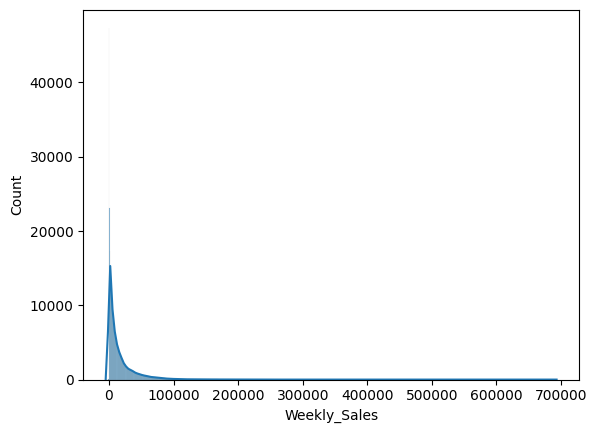

In [22]:
sns.histplot(df.Weekly_Sales,kde=True)
plt.show()

### Features visuals

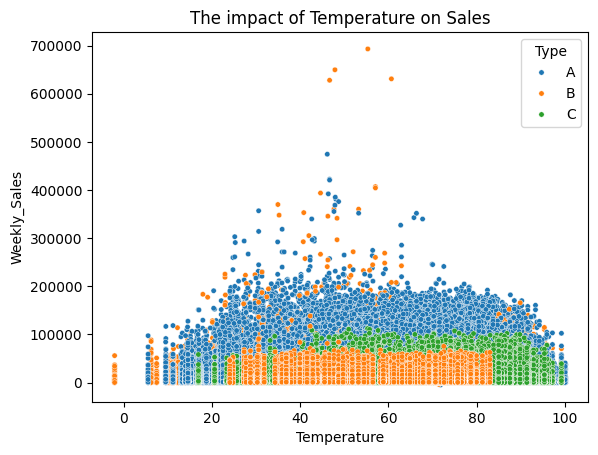

In [23]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df,hue='Type',s=15)
plt.title('The impact of Temperature on Sales')
plt.show()

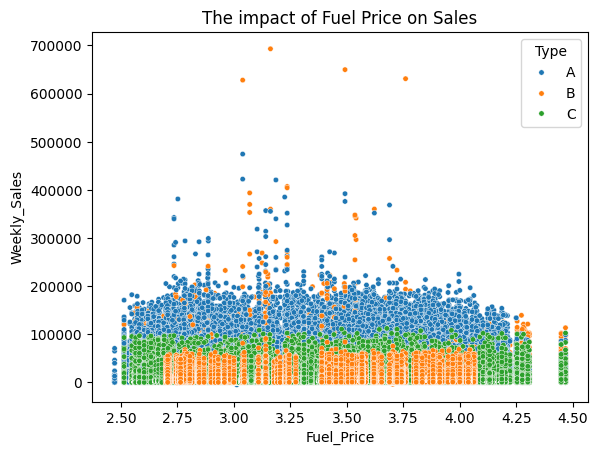

In [24]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df,hue='Type',s=15)
plt.title('The impact of Fuel Price on Sales')
plt.show()

In [25]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

In [26]:
# sns.lineplot(x='Date',y='Unemployment',data=df,hue='Type')
# plt.title('Unemployment Trend Over Time')
# plt.xticks(rotation=90)
# plt.show()

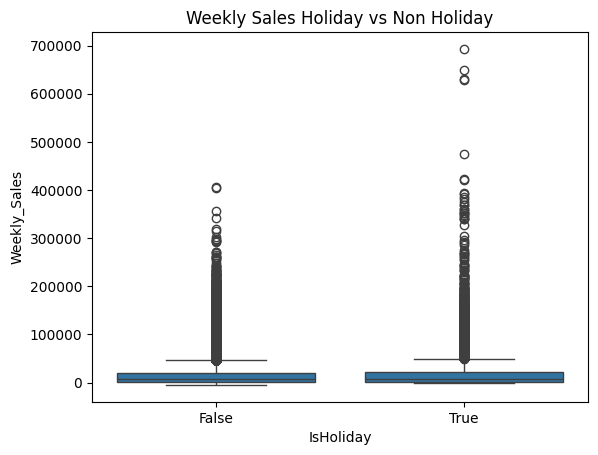

In [27]:
sns.boxplot(data=df,x='IsHoliday',y='Weekly_Sales')
plt.title('Weekly Sales Holiday vs Non Holiday')
plt.show()

# Data Prepeocessing :

## Handling Missing Values 

In [28]:
df.isna().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [29]:
df.Type.fillna(df.Type.mode()[0],inplace=True)

df.Size.fillna(df.Size.mode()[0],inplace=True)

df.Dept.fillna(df.Dept.mode()[0],inplace=True)

df.CPI.fillna(df.CPI.mean(),inplace=True)

df.Unemployment.fillna(df.Unemployment.mean(),inplace=True)

df.Weekly_Sales.fillna(df.Weekly_Sales.mean(),inplace=True)

df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True)

In [30]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
Day             0
dtype: int64

## Check and Handle Outliers :

In [31]:
df.describe()

,Store,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
count,423325.000000,423325.000000,423325.000000,423325,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.000000,423325.0,423325.000000
mean,22.203860,136325.620712,44.080971,2011-06-20 23:45:15.641174016,15981.258123,60.067140,3.361933,171.218863,7.957296,2010.976056,6.446477,25.815043,15.672786
min,1.000000,34875.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-7.290000,2.472000,126.064000,3.684000,2010.000000,1.000000,1.0,1.000000
25%,11.000000,93638.000000,18.000000,2010-10-15 00:00:00,2097.000000,46.670000,2.935000,132.064433,6.891000,2010.000000,4.000000,14.0,8.000000
50%,22.000000,140167.000000,37.000000,2011-06-24 00:00:00,7679.010000,62.070000,3.452000,182.256960,7.866000,2011.000000,6.000000,26.0,16.000000
75%,33.000000,202505.000000,72.000000,2012-02-24 00:00:00,20121.920000,74.260000,3.738000,212.416993,8.567000,2012.000000,9.000000,38.0,23.000000
max,45.000000,219622.000000,99.000000,2013-07-26 00:00:00,693099.360000,101.950000,4.468000,228.976456,14.313000,2013.000000,12.000000,52.0,31.000000
std,12.786244,61172.633653,30.555478,NaN,22664.057059,18.452599,0.458038,39.140016,1.862145,0.804053,3.245027,14.159845,8.753946


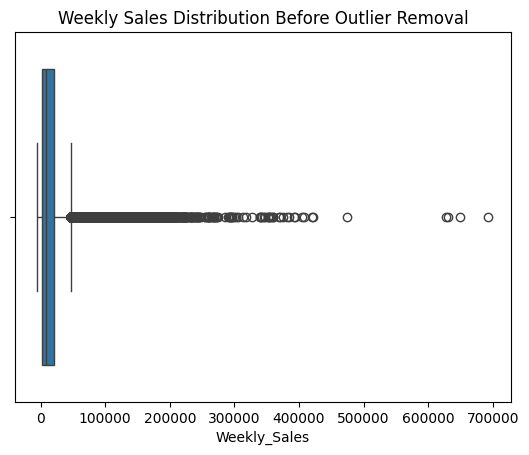

In [32]:
sns.boxplot(data=df,x='Weekly_Sales')
plt.title('Weekly Sales Distribution Before Outlier Removal')
plt.show()

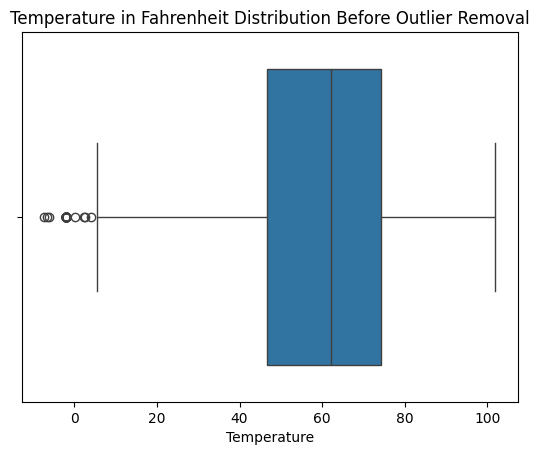

In [33]:
sns.boxplot(data=df,x='Temperature')
plt.title('Temperature in Fahrenheit Distribution Before Outlier Removal')
plt.show()

In [34]:
q1_weekly_sales = df.Weekly_Sales.quantile(.25)
q3_weekly_sales = df.Weekly_Sales.quantile(.75)

IQR_weekly_sales = q3_weekly_sales - q1_weekly_sales

lower_bound_weekly_sales = q1_weekly_sales - (1.5*IQR_weekly_sales)

upper__bound_weekly_sales = q3_weekly_sales + (1.5*IQR_weekly_sales)


In [35]:
df = df[(df['Weekly_Sales']>=lower_bound_weekly_sales )&(df['Weekly_Sales']<= upper__bound_weekly_sales)]

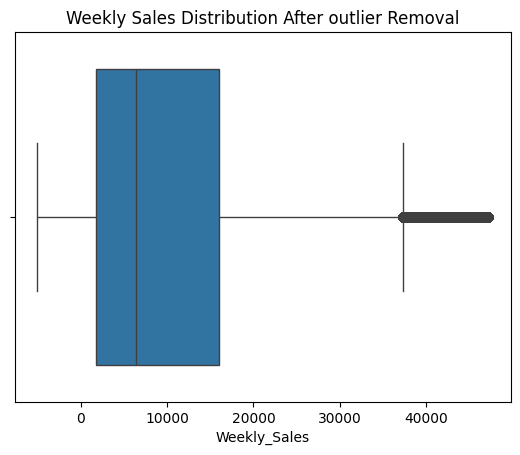

In [36]:
sns.boxplot(x=df.Weekly_Sales)
plt.title('Weekly Sales Distribution After outlier Removal')
plt.show()

In [37]:
q1_Temperature = df.Temperature.quantile(.25)
q3_Temperature = df.Temperature.quantile(.75)

IQR_Temperature = q3_Temperature - q1_Temperature

lower_bound_Temperature = q1_Temperature - (1.5*IQR_Temperature)

upper__bound_Temperature = q3_Temperature + (1.5*IQR_Temperature)

df = df[(df['Temperature']>=lower_bound_Temperature )&(df['Temperature']<= upper__bound_Temperature)]
 
#  Temperature in Fahrenheit


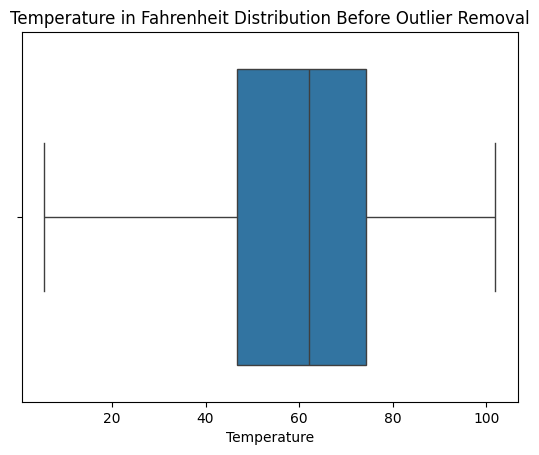

In [38]:
sns.boxplot(data=df,x='Temperature')
plt.title('Temperature in Fahrenheit Distribution Before Outlier Removal')
plt.show()

In [39]:
q1_Unemployment = df.Unemployment.quantile(.25)
q3_Unemployment = df.Unemployment.quantile(.75)

IQR_Unemployment = q3_Unemployment - q1_Unemployment

lower_bound_Unemployment = q1_Unemployment - (1.5*IQR_Unemployment)

upper_bound_Unemployment = q3_Unemployment + (1.5*IQR_Unemployment)

df = df[(df['Unemployment']>=lower_bound_Unemployment )&(df['Unemployment']<= upper_bound_Unemployment)]

# run this code , twoice to remove outliers


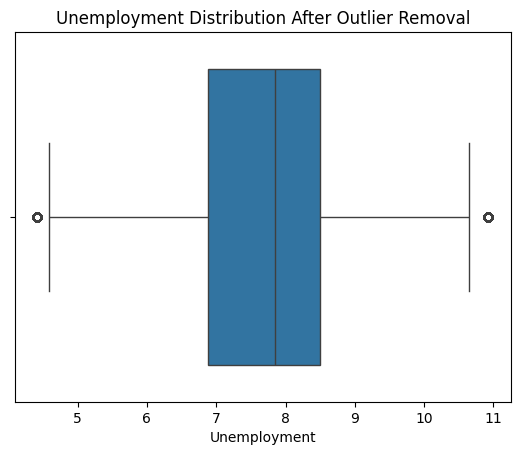

In [40]:
sns.boxplot(data=df,x='Unemployment')
plt.title('Unemployment Distribution After Outlier Removal')
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

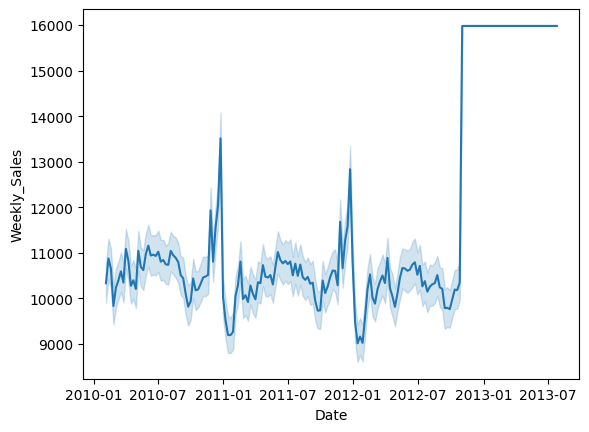

In [41]:
sns.lineplot(x='Date',y='Weekly_Sales',data=df)

## Encoding :

In [42]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,A,151315.0,1.0,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,2010,2,5,5
2,1,A,151315.0,3.0,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,2010,2,5,5
3,1,A,151315.0,4.0,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,2010,2,5,5
4,1,A,151315.0,5.0,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,2010,2,5,5
5,1,A,151315.0,6.0,2010-02-05,5749.03,False,42.31,2.572,211.096358,8.106,2010,2,5,5


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357701 entries, 0 to 423324
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         357701 non-null  int64         
 1   Type          357701 non-null  object        
 2   Size          357701 non-null  float64       
 3   Dept          357701 non-null  float64       
 4   Date          357701 non-null  datetime64[ns]
 5   Weekly_Sales  357701 non-null  float64       
 6   IsHoliday     357701 non-null  bool          
 7   Temperature   357701 non-null  float64       
 8   Fuel_Price    357701 non-null  float64       
 9   CPI           357701 non-null  float64       
 10  Unemployment  357701 non-null  float64       
 11  Year          357701 non-null  int32         
 12  Month         357701 non-null  int32         
 13  Week          357701 non-null  UInt32        
 14  Day           357701 non-null  int32         
dtypes: UInt32(1), bool(1),

In [44]:
df.Type.value_counts()

Type
A    178602
B    144935
C     34164
Name: count, dtype: int64

In [45]:
df.IsHoliday.value_counts()

IsHoliday
False    332484
True      25217
Name: count, dtype: int64

##### Features that must be encoded :
   - (Type) >> Before_encode | Data {A,B,C} Vs After_encode | Data{0,1,2} 
   - (IsHoliday) >> Before_encode | Data {True,False} Vs After_encode | Data{1,2}

###### Type Encoding

In [46]:
type_encoder=OrdinalEncoder(categories=[['A','B','C']])

In [47]:
df['Type']=type_encoder.fit_transform(df[['Type']])

###### IsHoliday Encoding

In [48]:
holiday_encoder=OneHotEncoder()

In [49]:
enc_holiday=pd.DataFrame(holiday_encoder.fit_transform(df[['IsHoliday']]).toarray(),columns=["Normal Day", "Holiday Day"])

In [50]:
enc_holiday.head()

,Normal Day,Holiday Day
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [51]:
df.drop(columns='IsHoliday',inplace=True)
df=pd.concat([df,enc_holiday],axis=1)

In [52]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Normal Day,Holiday Day
0,1.0,0.0,151315.0,1.0,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,2010.0,2.0,5,5.0,1.0,0.0
2,1.0,0.0,151315.0,3.0,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,2010.0,2.0,5,5.0,1.0,0.0
3,1.0,0.0,151315.0,4.0,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,2010.0,2.0,5,5.0,1.0,0.0
4,1.0,0.0,151315.0,5.0,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,2010.0,2.0,5,5.0,1.0,0.0
5,1.0,0.0,151315.0,6.0,2010-02-05,5749.03,42.31,2.572,211.096358,8.106,2010.0,2.0,5,5.0,1.0,0.0


## Data Splittng

## Scaling :

## Modeling


## Measure preformance 